In [1]:
include("Main_module.jl")
using .TDQMC

In [2]:
using DataFrames, CSV, PyPlot

In [3]:
df = Matrix(CSV.read("Displace_Ensemble.csv", DataFrame))

10001×501 Matrix{Float64}:
 0.235243  0.554252  -0.939101    2.80733  …  0.942939  -0.310769    0.0
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.05
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.1
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.15
 0.235243  0.554252  -0.939101    2.80733     0.942939  -0.310769    0.2
 0.235243  0.554251  -0.939101    2.80733  …  0.942939  -0.310769    0.25
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.3
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.35
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.4
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.45
 0.235243  0.554251  -0.939101    2.80733  …  0.942939  -0.310769    0.5
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.55
 0.235243  0.554251  -0.939101    2.80733     0.942939  -0.310769    0.6
 ⋮                

In [6]:
P = Parameter{Float64,Int64}(space_N = 20001, scope = 200.0, Δt = 0.05, step_t = 10000)

Parameter{Float64, Int64}(1, 500, [1], 20001, 200.0, 0.02, 0.0008, range(-200.0, stop=200.0, length=20001), 0.05, 10000)

In [4]:
Dy = Dynamics{Float64}()
Dy.Displace = reshape(df[:, 1:end-1], (10000 + 1, 500, 1))

10001×500×1 Array{Float64, 3}:
[:, :, 1] =
 0.235243  0.554252  -0.939101    2.80733  …  0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554252  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733  …  0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733  …  0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733     0.821298  0.942939  -0.310769
 0.235243  0.554251  -0.939101    2.80733    

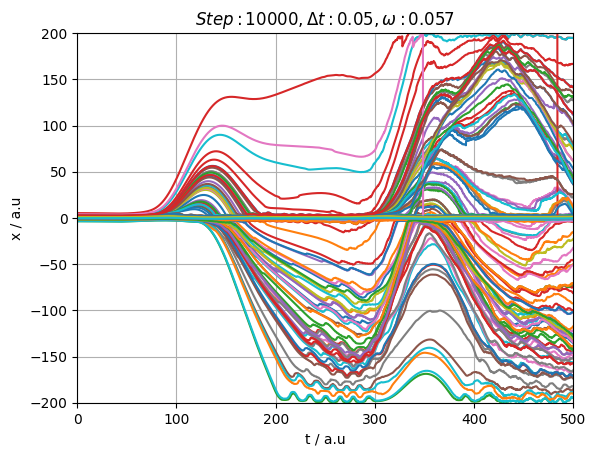

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


PyObject Text(0.5, 1.0, '$Step:10000,\\Delta t:0.05,\\omega:0.057$')

In [7]:
plot(real(P.Δt).* (0:P.step_t), Dy.Displace[:, :, 1])
ylim(-200.0, 200.0)
xlim(0, P.Δt * P.step_t)
xlabel("t / a.u")
ylabel("x / a.u")
grid()
title(L"Step:10000,\Delta t:0.05,\omega:0.057")

In [8]:
findall(x -> abs(x) >= 200, Dy.Displace[:, :, 1])

2-element Vector{CartesianIndex{2}}:
 CartesianIndex(9680, 344)
 CartesianIndex(6970, 417)

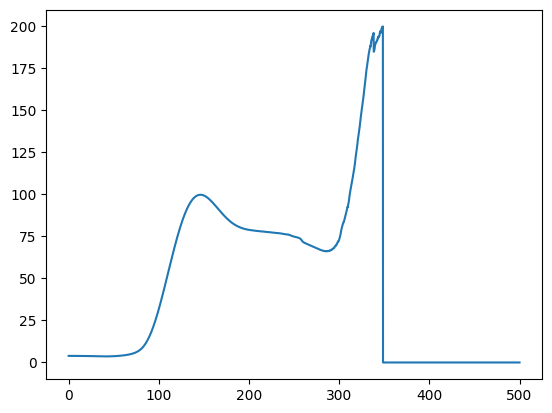

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007F4ADE50>

In [9]:
plot(real(P.Δt).* (0:10000), Dy.Displace[:, 417, 1])

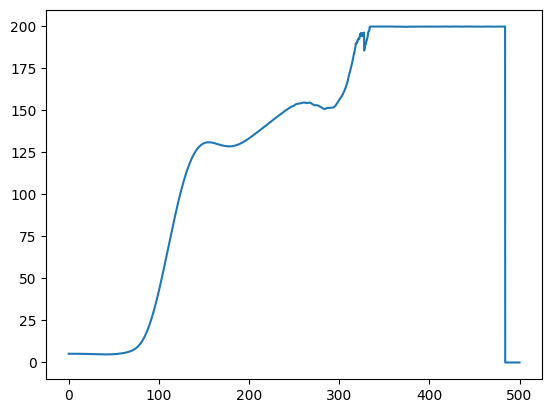

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007F1E42B0>

In [10]:
plot(real(P.Δt).* (0:10000), Dy.Displace[:, 344, 1])

In [ ]:
frequency, Total_ft_dipole, Total_ft_acc = HHG(P, Dy)

In [ ]:
semilogy(frequency, abs2.(Total_ft_dipole ./ (10000 * P.Δt)))
semilogy(frequency, abs2.(Total_ft_acc ./ (10000 * P.Δt)))
xticks(0.057 * collect(0:2:20), collect(0:2:20))